In [3]:
#VARIABLE DESCRIPTIONS OF TITANIC DATASET FROM KAGGLE:
# survival        Survival
#                 (0 = No; 1 = Yes)
# pclass          Passenger Class
#                 (1 = 1st; 2 = 2nd; 3 = 3rd)
# name            Name
# sex             Sex
# age             Age
# sibsp           Number of Siblings/Spouses Aboard
# parch           Number of Parents/Children Aboard
# ticket          Ticket Number
# fare            Passenger Fare
# cabin           Cabin
# embarked        Port of Embarkation
#                 (C = Cherbourg; Q = Queenstown; S = Southampton)

In [4]:
#The first phase of data analysis is posing a question.
#After looking at the data for the first time, we should ask ourself a few questions:
#I too have few questions in mind after looking into the dataset.
#     1)What proportion of passengers survived vs perished?
#     2)What kind of passengers are likely to survive in Titanic Incidence(Male or Female,
#       1st class vs 2nd class vs 3 rd class )?
#     3)Was there any association between Age and Fare?

In [2]:
#The first thing we have to do is import the Pandas package.Pandas has its own functions to read or write a .csv
#file.I am going to create a new object called 'df' for storing the pandas version of titanic.csv.
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns        #Seaborn is a Python visualization library based on matplotlib. It provides a high-level interface for 
                            #drawing attractive statistical graphics.
                             
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv('titanic.csv', header=0)                   #Loading A CSV data(Titanic dataset in CSV format) Into Pandas

In [11]:
#Let's check the head of the data to get a better sense of what the variables look like:

df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [12]:
type(df)

pandas.core.frame.DataFrame

In [7]:
df.dtypes

#The output shows us that we're working with a set of 889 records and 12 columns. Several of the column variables are encoded as
#numeric data types (ints and floats) but a few of them are encoded as "object"

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [13]:
#df.info gives a very useful information.We can see immediately we have 891 entries (rows), and for most of the variables we have
#complete values (891 are non-null). But not for Age, or Cabin, or Embarked -- those have nulls somewhere.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [9]:
#After getting a sense of the data's structure, it is a good idea to look at a statistical summary of the variables with df.describe()
#Pandas has taken all of the numerical columns and quickly calculated the mean, std, minimum and maximum value. 
#Notice that non-numeric columns are dropped from the statistical summary provided by df.describe()

df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [10]:
df['Age'][0:10]

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
5     NaN
6    54.0
7     2.0
8    27.0
9    14.0
Name: Age, dtype: float64

In [11]:
type(df['Age'])

#A single column is neither an numpy array, nor a pandas dataframe -- but rather a pandas-specific object called a data Series.

pandas.core.series.Series

In [12]:
df['Age'].mean()

29.69911764705882

In [13]:
df[ ['Sex', 'Pclass', 'Age'] ]

,Sex,Pclass,Age
0,male,3,22.0
1,female,1,38.0
2,female,3,26.0
3,female,1,35.0
4,male,3,35.0
5,male,3,NaN
6,male,1,54.0
7,male,3,2.0
8,female,3,27.0
9,female,2,14.0


In [14]:
#There are few unnecessary variables which we might remove from our dataset like "Passenger ID","Cabin","Ticket".

In [50]:
del df["PassengerId"]
del df["Cabin"]
del df["Ticket"]
df.info()              #After deleting few unnecessary variables like "Passenger ID","Ticket"."Cabin

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Name        891 non-null object
Sex         891 non-null object
Age         891 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null float64
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(3)
memory usage: 62.7+ KB


In [68]:
                                           #Data Transformation
#When you first load a data set, some of the variables may be encoded as data types that don't fit well with what the data really is or
#what it means.
#We can notice that in this dataset variables like "Survived","Pclass","Sex" are shown as int and object.So, we need to convert
#those variabls to factor/Categorical

df["Survived"]=df["Survived"].astype('category')
df["Pclass"]=df["Pclass"].astype('category')
df["Sex"]=df["Sex"].astype('category')

In [72]:
#                                      One-Way Tables
#Create frequency tables (also known as crosstabs) in pandas using the pd.crosstab() function. The function takes one or more array-like 
#objects as indexes or columns and then constructs a new DataFrame of variable counts based on the supplied arrays. 
#Let's make a one-way table of the survived variable:

new_survived = pd.Categorical(df["Survived"])
new_survived = new_survived.rename_categories(["Died","Survived"])              
new_survived.describe()

#The below table shows that out of 891 passengers in the ship,61% perished and just 38% people survived.

,counts,freqs
categories,,
Died,549,0.616162
Survived,342,0.383838


In [79]:
df["Survived"] = new_survived
df.head(3)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Family
0,Died,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,1
1,Survived,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,1
2,Survived,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,0


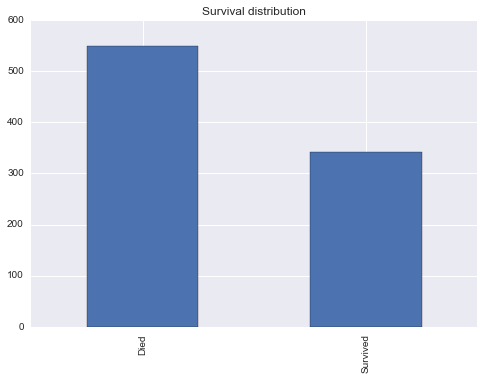

In [95]:
#The above table are more clearly visualized by the below bar plot.
df.Survived.value_counts().plot(kind='bar')
plt.title('Survival distribution')


In [82]:
#Pclass is an integer that indicates a passenger's class, with 1 being first class, 2 being second class and 3 being third class.
#Passenger class is a category, so it doesn't make a lot of sense to encode it as a numeric variable. 
#one-way table of the Pclass variable:

new_Pclass = pd.Categorical(df["Pclass"],
                           ordered=True)
new_Pclass = new_Pclass.rename_categories(["Class1","Class2","Class3"])   
df["Pclass"] = new_Pclass
new_Pclass.describe()


,counts,freqs
categories,,
Class1,216,0.242424
Class2,184,0.206510
Class3,491,0.551066


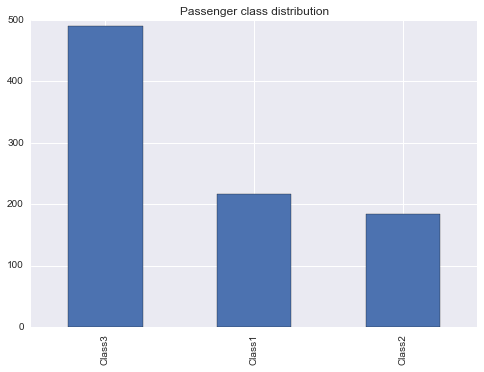

In [96]:
df.Pclass.value_counts().plot(kind='bar')
plt.title('Passenger class distribution')

In [31]:
#one-way table of the Sex variable:

pd.crosstab(index=df["Sex"],columns="count")

col_0,count
Sex,
female,314
male,577


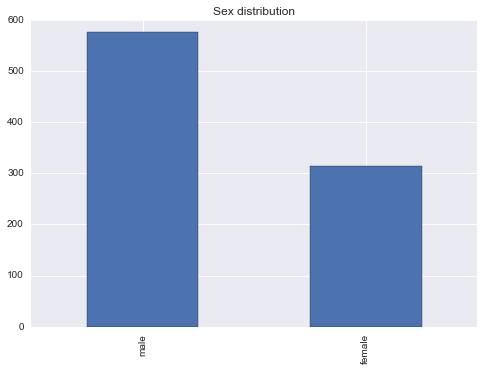

In [97]:
df.Sex.value_counts().plot(kind='bar')
plt.title('Sex distribution')

In [36]:
#                                                     Two-Way Tables
#Two-way frequency tables, also called contingency tables, are tables of counts with two dimensions where each dimension is a different 
#variable. Two-way tables can give you insight into the relationship between two variables. To create a two way table, pass two variables
#to the pd.crosstab() function instead of one:

# Table of survival vs. sex

survived_sex = pd.crosstab(index=df["Survived"], 
                           columns=df["Sex"])
survived_sex.index= ["died","survived"]
survived_sex
#The below table answers 1st part of my 1st question.The below table shows that out of 342 survived passengers 233(68.12%) were female 
#and 109(31.8%) were male meaning more Female passengers survived compared to male passengers.

Sex,female,male
died,81,468
survived,233,109


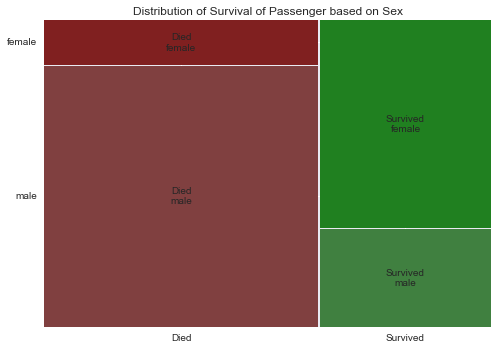

In [98]:
from statsmodels.graphics.mosaicplot import mosaic    #mosaic plot allows to visualize multivariate categorical data in a rigorous
                                                      #and informative way.
mosaic(df, ['Survived', 'Sex',]);
plt.title('Distribution of Survival of Passenger based on Sex')

In [38]:
# Table of survival vs passenger class

survived_class = pd.crosstab(index=df["Survived"], 
                            columns=df["Pclass"],
                             margins=True)

survived_class.columns = ["class1","class2","class3","rowtotal"]
survived_class.index= ["died","survived","coltotal"]

survived_class

,class1,class2,class3,rowtotal
died,80,97,372,549
survived,136,87,119,342
coltotal,216,184,491,891


In [39]:
#To get the proportion of counts along each column (in this case, the survival rate within each passenger class) divide by the 
#column totals:

survived_class/survived_class.ix["coltotal"]

#The below table shows that the passenger travelling in 1st class were more likely to survived followed by 2nd class and 3rd class.

,class1,class2,class3,rowtotal
died,0.37037,0.527174,0.757637,0.616162
survived,0.62963,0.472826,0.242363,0.383838
coltotal,1.00000,1.000000,1.000000,1.000000


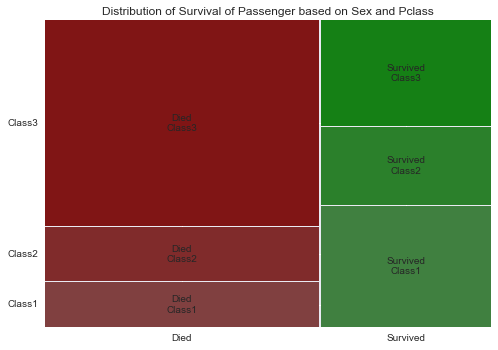

In [99]:
from statsmodels.graphics.mosaicplot import mosaic
mosaic(df, ['Survived', 'Pclass',]);
plt.title('Distribution of Survival of Passenger based on class')

In [41]:
#                Higher Dimensional Tables
#Now i am going to create a 3-way table inspecting survival, sex and passenger class

surv_sex_class = pd.crosstab(index=df["Survived"], 
                             columns=[df["Pclass"],
                                      df["Sex"]],
                             margins=True)

surv_sex_class

Pclass        1           2           3       All
Sex      female male female male female male     
Survived                                         
0             3   77      6   91     72  300  549
1            91   45     70   17     72   47  342
All          94  122     76  108    144  347  891

In [42]:
surv_sex_class/surv_sex_class.ix["All"]

#Below table gives more insight on the survival rate based on sex and Passengers class.
#Frequency tables are a simple yet effective tool for exploring relationships between variables.
#Here we see something quite interesting: over 90% of women in first class and second class survived, but only 50% of women in 
#third class survived. Men in first class also survived at a greater rate than men in lower classes. Passenger class seems to have a 
#significant impact on survival, so it would likely be useful to include as a feature in a predictive model.

Pclass           1                   2                3                 All
Sex         female      male    female      male female      male          
Survived                                                                   
0         0.031915  0.631148  0.078947  0.842593    0.5  0.864553  0.616162
1         0.968085  0.368852  0.921053  0.157407    0.5  0.135447  0.383838
All       1.000000  1.000000  1.000000  1.000000    1.0  1.000000  1.000000

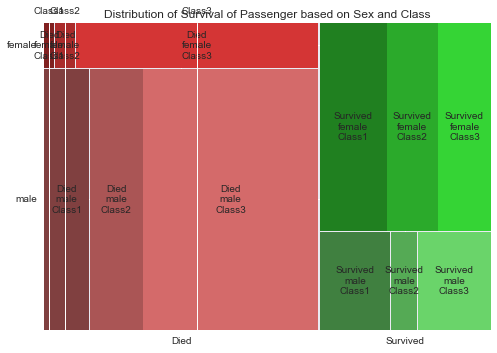

In [101]:
from statsmodels.graphics.mosaicplot import mosaic
mosaic(df, ['Survived', 'Sex','Pclass']);
plt.title('Distribution of Survival of Passenger based on Sex and Class')

In [44]:
df["Age"].describe()

#Below table shows that the count of age(712) is less than the total row count of the titanic data set(889). 
#This indicates missing data. We can get the row indexes of the missing values with np.where():

missing = np.where(df["Age"].isnull() == True)
missing

#With 177 missing values it's probably not a good idea to throw all those records away. Here are a few ways we could deal with them:
#  1)Replace the null values with 0s
#  2)Replace the null values with some central value like the mean or median
#  3)Impute values (estimate values using statistical/predictive modeling methods.).
#  4)Split the data set into two parts: one set with where records have an Age value and another set where age is null.

(array([  5,  17,  19,  26,  28,  29,  31,  32,  36,  42,  45,  46,  47,
         48,  55,  64,  65,  76,  77,  82,  87,  95, 101, 107, 109, 121,
        126, 128, 140, 154, 158, 159, 166, 168, 176, 180, 181, 185, 186,
        196, 198, 201, 214, 223, 229, 235, 240, 241, 250, 256, 260, 264,
        270, 274, 277, 284, 295, 298, 300, 301, 303, 304, 306, 324, 330,
        334, 335, 347, 351, 354, 358, 359, 364, 367, 368, 375, 384, 388,
        409, 410, 411, 413, 415, 420, 425, 428, 431, 444, 451, 454, 457,
        459, 464, 466, 468, 470, 475, 481, 485, 490, 495, 497, 502, 507,
        511, 517, 522, 524, 527, 531, 533, 538, 547, 552, 557, 560, 563,
        564, 568, 573, 578, 584, 589, 593, 596, 598, 601, 602, 611, 612,
        613, 629, 633, 639, 643, 648, 650, 653, 656, 667, 669, 674, 680,
        692, 697, 709, 711, 718, 727, 732, 738, 739, 740, 760, 766, 768,
        773, 776, 778, 783, 790, 792, 793, 815, 825, 826, 828, 832, 837,
        839, 846, 849, 859, 863, 868, 878, 888], dt

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000020F05C46BE0>]], dtype=object)

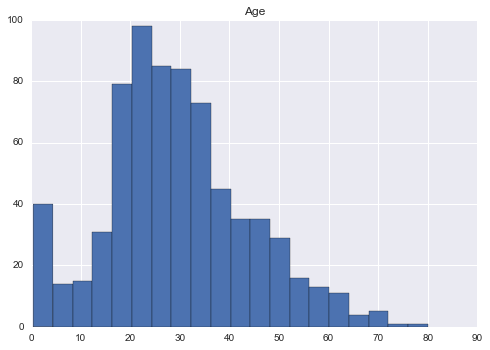

In [45]:
#Now to get a sense of the distribution of ages by creating a histogram of the age variable with df.hist():

df.hist(column='Age',bins=20)

#From the histogram below,we see that ages between 20 and 30 are the most common, so filling in missing values with a central number 
#like the mean or median wouldn't be entirely unreasonable. Let's fill in the missing values with the median value of 28

In [46]:
#Replacing the missing values of Age variable with the mean value of 28
new_age_var = np.where(df["Age"].isnull(),28,df["Age"])    
df["Age"] = new_age_var 
df["Age"].describe()

count    891.000000
mean      29.361582
std       13.019697
min        0.420000
25%       22.000000
50%       28.000000
75%       35.000000
max       80.000000
Name: Age, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000020F05CB20B8>]], dtype=object)

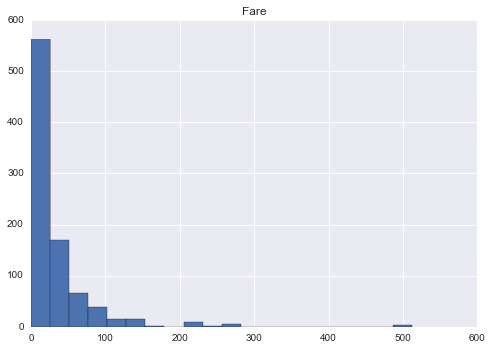

In [47]:

df.hist(column='Fare',bins=20)

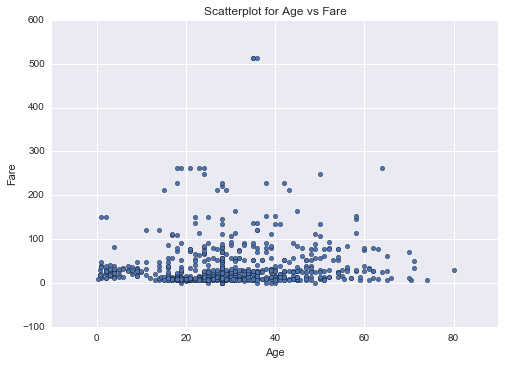

In [104]:
df.plot.scatter(x='Age', y='Fare')
plt.title('Scatterplot for Age vs Fare')

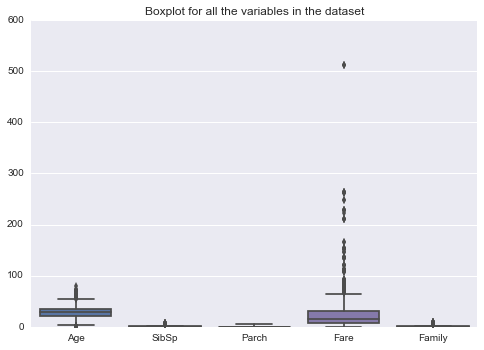

In [103]:
sns.boxplot(data=df);
plt.title('Boxplot for all the variables in the dataset')

#In a boxplot, the central box represents 50% of the data and the central bar represents the median. The dotted lines with bars
#on the ends are "whiskers" which encompass the great majority of the data and points beyond the whiskers indicate uncommon values.

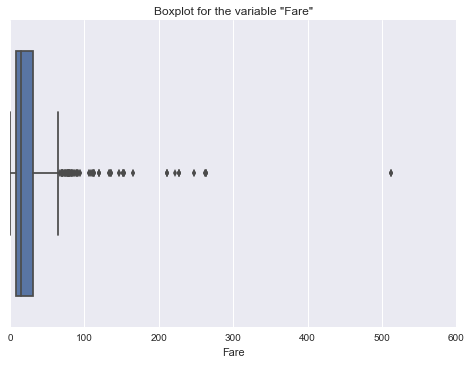

In [102]:

sns.boxplot(x='Fare', data=df);
plt.title('Boxplot for the variable "Fare"')

#In this case, we have some uncommon values that are so far away from the typical value that the box appears squashed in the plot: 
#this is a clear indication of outliers. Indeed, it looks like one passenger paid almost twice as much as any other passenger. 
#Even the passengers that paid between 200 and 300 are far higher than the vast majority of the other passengers.

In [53]:
index = np.where(df["Fare"] == max(df["Fare"]) )

df.loc[index]               #.loc is use to access rows by their indexes whereas.iloc accesses rows by position.

#In the boxplot above there appears to be on passenger who paid more than all the others, but the output below shows that 
#there were actually three passengers who all paid the same high fare.
#Similar to NA values, there's no single cure for outliers. We can either keep them, delete them or transform them in some way to try to
#reduce their impact. 

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
258,1,1,"Ward, Miss. Anna",female,35.0,0,0,512.3292,C
679,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,512.3292,C
737,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,512.3292,C


In [54]:
#                                   Creating new variable for this dataset
#The variables present when we load a data set aren't always the most useful variables for analysis. Creating new variables that 
#are derivations or combinations existing ones is a common step to take before jumping into an analysis or modeling task.
#Creating a new variable can be as simple as taking one variable and adding, multiplying or dividing by another. Let's create a new 
#variable, Family, that combines SibSp and Parch to indicate the total number of family members (siblings, spouses, parents and children)
#a passenger has on board:

df["Family"] = df["SibSp"] + df["Parch"]

In [55]:
df.info()

#Now we can see that we have one more variable called 'Family' in our dataset which include the total number of family members 
#(siblings, spouses, parents and children)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Name        891 non-null object
Sex         891 non-null object
Age         891 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null float64
Embarked    889 non-null object
Family      891 non-null int64
dtypes: float64(2), int64(5), object(3)
memory usage: 69.7+ KB


In [56]:
#let's find out who had the most family members on board:

most_family = np.where(df["Family"] == max(df["Family"]))

df.loc[most_family]

#The below table shows that there were 7 people on board with 8 siblings/spouses and 2 parents/children.We can also notice that nobody survived 
#whose family size were 10.

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Family
159,0,3,"Sage, Master. Thomas Henry",male,28.0,8,2,69.55,S,10
180,0,3,"Sage, Miss. Constance Gladys",female,28.0,8,2,69.55,S,10
201,0,3,"Sage, Mr. Frederick",male,28.0,8,2,69.55,S,10
324,0,3,"Sage, Mr. George John Jr",male,28.0,8,2,69.55,S,10
792,0,3,"Sage, Miss. Stella Anna",female,28.0,8,2,69.55,S,10
846,0,3,"Sage, Mr. Douglas Bullen",male,28.0,8,2,69.55,S,10
863,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,28.0,8,2,69.55,S,10


In [57]:
df.corr(method='pearson')                   #Correlation between variables in the dataset.Correlation tells the %age variability in once 
                                            #variable because of the another variable

,Survived,Pclass,Age,SibSp,Parch,Fare,Family
Survived,1.000000,-0.338481,-0.064910,-0.035322,0.081629,0.257307,0.016639
Pclass,-0.338481,1.000000,-0.339898,0.083081,0.018443,-0.549500,0.065997
Age,-0.064910,-0.339898,1.000000,-0.233296,-0.172482,0.096688,-0.245619
SibSp,-0.035322,0.083081,-0.233296,1.000000,0.414838,0.159651,0.890712
Parch,0.081629,0.018443,-0.172482,0.414838,1.000000,0.216225,0.783111
Fare,0.257307,-0.549500,0.096688,0.159651,0.216225,1.000000,0.217138
Family,0.016639,0.065997,-0.245619,0.890712,0.783111,0.217138,1.000000


In [58]:
df[['Fare','Age']].corr()

,Fare,Age
Fare,1.000000,0.096688
Age,0.096688,1.000000


In [59]:
#Overall i did full analyses on Titanic dataset which covered data exploration,data preparation and data visualization.After data 
#analyses i am now able to answer the question which came into my mind when seeing the dataset for the first time.

In [94]:
#Conclusion/Limitations 

#This dataset had lots of missing values especially for Age variable.So i had just imputed 
#the missing values with the mean value of age.There is always pros and cons of whatever imputation method we choose.Imputation methods 
#introduce a bias towards the existing data, and the value we're using to impute towards.
#There were also so many missing values for the variable "Cabin" which i just ommited from the analysis,which i think would have been 
#useful in the analysis if the proper Cabin information would have been provided.


